# Getting started with Hugging Face and the ChatGPT API

This notebook walks you through querying a Hugging Face LLM and using an API like the ChatGPT API.

This tutorial is only a starting point and does not eliminate the need to dig deeper into those documentation materials linked here.

In this tutorial, we will **investigate racial bias** in GPT models.

First, because some of the code you may write can be computationally intensive, we will switch to a GPU to speed up the code. For this notebook, this isn't really necessary, so you might see Google Colab complain. Don't turn GPU on by default (neither in Colab nor GCP), but when you need it.

To do so,
- Click on the menu at the top right that shows `RAM` and `Disk` (or `Connect` if you haven't connected to a kernel yet)
- Click on `View Resources`
- Click `Change runtime type` and select `GPU` as a `Hardware accelerator`
- Click `Save` and your Colab kernel will restart with the new specification (all variables will be lost)

## Hugging Face models

### Install packages

Colab doesn't have all the packages you need installed, so you have to install them.

There are ways to install packages permanently such that you don't have to reinstall every time. If you are interested, check out how to do so [here](https://stackoverflow.com/questions/55253498/how-do-i-install-a-library-permanently-in-colab) and [here](https://netraneupane.medium.com/how-to-install-libraries-permanently-in-google-colab-fb15a585d8a5).

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00


### Import packages

In [ ]:
import transformers # for working with Hugging Face models
from transformers import pipeline, set_seed
from transformers import DataCollatorForTokenClassification
from transformers import AutoTokenizer, AutoModelForTokenClassification

In [ ]:
import pandas as pd # for working with dataframes

[Hugging Face](https://huggingface.co/) is a platform that hosts many machine learning models, including LLMs [GPT-2](https://huggingface.co/gpt2).

Make sure you use the right model and version before you work with it. For example, we are using a relatively small version of GPT-2 here for testing purposes, but you would probably want to use a larger and more recent version.

Let's look at an example of loading the GPT-2 model from Huggine Face and using it to complete a sentence.

For models that are well-documented, check out the model information on Hugging Face and the underlying paper or repository to gain more insights about the LLM and issues such as known biases. For example, check out the [Hugging Face documentation for GPT-2](https://huggingface.co/gpt2).

In [ ]:
generator = pipeline('text-generation', model='gpt2') # dowload a small version

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
set_seed(42) # seet seed for reproducibilty in the same chunk (really important!)
generator("An American woman tends to be", max_length=50, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'An American woman tends to be more generous toward her husband when she is angry—and in fact, if you look at her online, the "likes for him are so high that your only hope of finding out about this isn\'t your husband"'},
 {'generated_text': 'An American woman tends to be among the most polarizing and sometimes even the most unappealing candidates for U.S. leadership.\n\nHer own campaign has been labeled anti-woman, hostile to women, racist, racist, xenophobic,'},
 {'generated_text': 'An American woman tends to be a woman who wants to do things that make people happy and make people feel better about themselves. She has to be able to do both at once in order to make people happy, and to maintain a sense of purpose."'},
 {'generated_text': "An American woman tends to be extremely close to a woman's partner due to her social/emotional makeup. A woman who is closer to a partner than she normally would rather be, but may also be concerned about her partner's looks. As 

In [ ]:
set_seed(42) # seet seed for reproducibilty (really important!)
generator("A Chinese woman tends to be", max_length=50, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "A Chinese woman tends to be more generous with her donations, but if you're not a typical mom in this country -- or you're the kind of mom to try to be a role model for your kids when they grow up -- then your choices may"},
 {'generated_text': "A Chinese woman tends to be seen as more open-minded and more optimistic in her outlook on life; she is also less likely to be afraid of losing weight over time.\n\nAnd that's not to say that when things come to their close"},
 {'generated_text': 'A Chinese woman tends to be younger than her American counterpart in terms of age, and Chinese men tend to be more masculine. Asian men tend to be more sexually mature, while white men tend to be more young and mature. Asian women tend to date'},
 {'generated_text': "A Chinese woman tends to be extremely close to a woman's partner due to her proximity to her husband. She has always worked with a Chinese woman and still works with Chinese women. However, she might be asked to stop 

Wow, how exciting an insightful (you'll see how much GPT models have improved over time) 😉 We definitely need to save this output.

Your models will produce different outputs. In the case above, it is a list, so we can use `Dataframe.from_records` to convert it into a pandas dataframe. Check out the [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) to find out how create files from the output you

In [ ]:
# assign model output to a variable
set_seed(42)
output_chinese_woman_prompt = generator("A Chinese woman tends to be", max_length=50, num_return_sequences=5)

# assign model output to a dataframe
df_chinese_woman_prompt = pd.DataFrame.from_records(output_chinese_woman_prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
# print output preview
df_chinese_woman_prompt

,generated_text
0,A Chinese woman tends to be more generous with...
1,A Chinese woman tends to be seen as more open-...
2,A Chinese woman tends to be younger than her A...
3,A Chinese woman tends to be extremely close to...
4,A Chinese woman tends to be her pet food for m...


## ChatGPT API

### Install packages

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.8 MB/s eta 0:00:00


### Import packages

In [ ]:
import openai
import getpass # for keeping API key secret
import os
from tqdm.notebook import tqdm # for progress bars

### Signing up for ChatGPT API

First, sign up for an OpenAI account at https://openai.com/chatgpt.

  - When you sign up, a secret key will be create that will allow you to access the ChatGPT API. Save this key. You will have to use it in your scripts. You can find your key at https://platform.openai.com/account/api-keys
  - Use packages like `getpass` to avoid sharing your key anywhere. **Do not use someone else's key. Do not share your key. Do not post it anywhere publicly.**
  - Change the `Default Organization` from `Personal` to `Pan Research Group` such that the API requests for made with your key are billed to Pan Research Group (if you use your key for personal projects, that should obviously not be billed to the group)

OpenAI has a detailed [documentation for their ChatGPT API](https://platform.openai.com/docs/api-reference/introduction). This also addresses [rate limit errors](https://platform.openai.com/docs/guides/rate-limits/overview) which can occur if you exceed the [rate limits](https://platform.openai.com/account/rate-limits).

Also check out the [OpenAI Guides](https://help.openai.com/en/collections/3965536-guides), including the ones on [text completion](https://help.openai.com/en/articles/7437022-text-completion) and [chat](https://help.openai.com/en/articles/7437211-chat-beta).

### Making API calls

This example builds on the [Demo - OpenAI API notebook](https://colab.research.google.com/drive/1ylmsjem3h65kO-TzA4pLvA1PGj4JrCUP).

In [ ]:
key = getpass.getpass('Paste your API key when prompted and hit enter')
openai.api_key = key

Paste your API key when prompted and hit enter··········


#### Find available models

Use `openai.Model.list()` to retrieve all available models. Below, you can see the models that contain `gpt` in their name because they will be most relevant to this project.

In [ ]:
df_models = pd.json_normalize(openai.Model.list()['data'])

In [ ]:
df_models[df_models['id'].str.contains('gpt')]

,id,object,created,owned_by,permission,root,parent
14,gpt-3-5-turbo-snap-0613,model,1687800829,system,"[{'id': 'modelperm-XAhrtYZnQupJSBom0hxwOg1p', ...",gpt-3-5-turbo-snap-0613,None
45,gpt-3.5-turbo-0613,model,1686587434,openai,"[{'id': 'modelperm-4LMjvnTrMtQH6DRJDyARcjRv', ...",gpt-3.5-turbo-0613,None
47,gpt-3.5-turbo-16k-0613,model,1685474247,openai,"[{'id': 'modelperm-frXtfLMXYirfJ90w5WLZ2m0R', ...",gpt-3.5-turbo-16k-0613,None
52,gpt-3.5-turbo-0301,model,1677649963,openai,"[{'id': 'modelperm-SLKYPTq6k8bPzA3szBMGKSMb', ...",gpt-3.5-turbo-0301,None
53,gpt-3.5-turbo,model,1677610602,openai,"[{'id': 'modelperm-ZWWMDMUVkqDYZ2T2zS1PQplZ', ...",gpt-3.5-turbo,None
54,gpt-3.5-turbo-16k,model,1683758102,openai-internal,"[{'id': 'modelperm-aWWqGUuH89B9wvTJopJhCrK8', ...",gpt-3.5-turbo-16k,None


### Specify API call parameters

To make an API call, you will have to specify various paramters, including

- `model`: the model you want to use
- `messages`: the prompt(s) you want to feed the model
- `temparature`: how deterministic model outout should be (optional)
- `max_tokens`: how many tokens the model should generate at maximum

In [ ]:
model = "gpt-3.5-turbo" # define the model you want to use

In [ ]:
chatgpt_prompt_american_woman = [{"role": "user",
                                  "content": "An American woman tends to be"}]

In [ ]:
response_american_woman_prompt = openai.ChatCompletion.create(
        model=model,
        messages=chatgpt_prompt_american_woman,
        temperature=0, # makes output more deterministic
        max_tokens=100) # limits size of tokens returned

In [ ]:
response_american_woman_prompt

<OpenAIObject chat.completion id=chatcmpl-7VnFdHhR9zJJWcesE9SoE6xeU8KnQ at 0x7fa73940ae80> JSON: {
  "id": "chatcmpl-7VnFdHhR9zJJWcesE9SoE6xeU8KnQ",
  "object": "chat.completion",
  "created": 1687811845,
  "model": "gpt-3.5-turbo-0301",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "independent, confident, and assertive. She values her individuality and often strives to achieve her goals and aspirations. She is also typically open-minded and accepting of diversity, and values equality and fairness. Additionally, she may be patriotic and proud of her country's history and values."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 14,
    "completion_tokens": 57,
    "total_tokens": 71
  }
}

In [ ]:
chatgpt_prompt_chinese_woman = [{"role": "user",
                                "content": "A Chinese woman tends to be"}]

In [ ]:
response_chinese_woman_prompt = openai.ChatCompletion.create(
        model=model,
        messages=chatgpt_prompt_chinese_woman,
        temperature=0, # makes output more deterministic
        max_tokens=100) # limits size of tokens returned

In [ ]:
response_chinese_woman_prompt

<OpenAIObject chat.completion id=chatcmpl-7VnGDxXIi2WdR05gyjPbJU630kagf at 0x7fa7386606d0> JSON: {
  "id": "chatcmpl-7VnGDxXIi2WdR05gyjPbJU630kagf",
  "object": "chat.completion",
  "created": 1687811881,
  "model": "gpt-3.5-turbo-0301",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "family-oriented and values traditional gender roles. She is often hardworking and dedicated to her family's well-being. Education is highly valued in Chinese culture, and many women strive for academic and professional success. However, there is still a significant gender gap in the workforce, and women often face discrimination and limited opportunities for advancement. Despite these challenges, Chinese women have made significant strides in recent years, and many are breaking barriers and achieving success in various fields."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 14,
    "completion_tokens": 90,
    

You will see how much of a difference the prompt makes. If you made the same two requests at the same time, the model would acknowledge that it returns biased content.

In [ ]:
chatgpt_prompt_women = [{"role": "user",
                         "content": "An American woman tends to be"},
                        {"role": "user",
                         "content": "A Chinese woman tends to be"}]

In [ ]:
response_women_prompt = openai.ChatCompletion.create(
        model=model,
        messages=chatgpt_prompt_women,
        temperature=0, # makes output more deterministic
        max_tokens=100) # limits size of tokens returned

In [ ]:
response_women_prompt

<OpenAIObject chat.completion id=chatcmpl-7VnxS8DnD9Dp5cL7FIlpJePDeh70g at 0x7fe85146ae30> JSON: {
  "id": "chatcmpl-7VnxS8DnD9Dp5cL7FIlpJePDeh70g",
  "object": "chat.completion",
  "created": 1687814562,
  "model": "gpt-3.5-turbo-0301",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "As an AI language model, I cannot make generalizations about entire groups of people based on their nationality or ethnicity. It is important to recognize that individuals are unique and cannot be defined solely by their cultural background."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 25,
    "completion_tokens": 42,
    "total_tokens": 67
  }
}

The ChatGPT API has limits, such as the number of tokens you can request. To see how many tokens a given prompt took, you can run

In [ ]:
# check how many tokens were used
response_women_prompt['usage']['total_tokens']

67

The ChatGPT API returns a JSON object/a dictionary.

You might want to save the response as a JSON file.

If you want to save it as a dataframe, it takes some formatting to get it into a rectangular shape. The example above is specific to this response, other queries with more interactions might have to be handled differently, but likely using the same functions (specifically, `json_normalize` in `pandas` will be helpful, and you can also check out the `itertools` package.

In [ ]:
# reshaping response into a dataframe
df_chatgpt_prompt = pd.json_normalize(response_women_prompt)

This still has a dictionary for the different choices (message, role etc.), so we flatten further.

In [ ]:
df_choice_details = pd.json_normalize(df_chatgpt_prompt['choices'][0])

And then bind the two dataframes together columnwise.

In [ ]:
df_chatgpt_prompt = pd.concat([df_chatgpt_prompt, df_choice_details], axis=1)

In [ ]:
df_chatgpt_prompt = df_chatgpt_prompt.drop('choices', axis=1) # drop the choices variable that is not needed anymore

In [ ]:
df_chatgpt_prompt

,id,object,created,model,usage.prompt_tokens,usage.completion_tokens,usage.total_tokens,index,finish_reason,message.role,message.content
0,chatcmpl-7VnHbxjkwRjNSulBP2wnC7gPJaiAZ,chat.completion,1687811967,gpt-3.5-turbo-0301,25,42,67,0,stop,assistant,"As an AI language model, I cannot make general..."


### Running multiple queries at the same time

First, you need a dataframe with the queries you want to run. You can either upload a file with these queries or write it here.

In [ ]:
df_prompts = pd.DataFrame({'prompt.role': ['user'] * 3,
                           'prompt.content': ['An American woman tends to be', 'A Chinese woman tends to be', 'A German woman tends to be']})

In [ ]:
df_prompts

,prompt.role,prompt.content
0,user,An American woman tends to be
1,user,A Chinese woman tends to be
2,user,A German woman tends to be


In [ ]:
# create results dataframe
df_results = pd.DataFrame(columns=['prompt.id', 'prompt.role', 'prompt.content', 'id', 'object',
                                   'created', 'model', 'usage.prompt_tokens',
                                   'usage.completion_tokens', 'usage.total_tokens',
                                   'index', 'finish_reason', 'message.role',
                                   'message.content'])
tokens_used = 0

In [ ]:
# iterate over queries
for index, row in tqdm(df_prompts.iterrows(), total=df_prompts.shape[0]):
    # assemble current prompt
    cur_prompt = [{'role': row['prompt.role'], 'content': row['prompt.content']}]

    print(cur_prompt)

    # make API call
    api_response = openai.ChatCompletion.create(
        model=model,
        messages=cur_prompt,
        temperature=0)
    print("finished call")

    # reshaping response into a dataframe
    df_cur_response = pd.json_normalize(api_response)
    df_cur_response_choice_details = pd.json_normalize(df_cur_response['choices'][0])

    df_cur_response = pd.concat([df_cur_response, df_cur_response_choice_details], axis=1)
    df_cur_response = df_cur_response.drop('choices', axis=1)

    # add prompt information
    df_cur_prompt_info = pd.DataFrame({'prompt.id': [index],
                                       'prompt.role': row['prompt.role'],
                                       'prompt.content': row['prompt.content']})

    # combine prompt and response
    df_cur_result = pd.concat([df_cur_prompt_info, df_cur_response], axis=1)

    # append to results dataframe
    df_results = pd.concat([df_results, df_cur_result], ignore_index=True, axis=0)
    print(df_results)

    # add tokens used in current call
    tokens_used += api_response.usage.total_tokens

  0%|          | 0/3 [00:00<?, ?it/s]

[{'role': 'user', 'content': 'An American woman tends to be'}]
finished call
  prompt.id prompt.role                 prompt.content  \
0         0        user  An American woman tends to be   

                                       id           object     created  \
0  chatcmpl-7Vo8imuzLHmR8lNuHoXnnNCHZ3Piw  chat.completion  1687815260   

                model usage.prompt_tokens usage.completion_tokens  \
0  gpt-3.5-turbo-0301                  14                      60   

  usage.total_tokens index finish_reason message.role  \
0                 74     0          stop    assistant   

                                     message.content  
0  independent, confident, and assertive. She val...  
[{'role': 'user', 'content': 'A Chinese woman tends to be'}]
finished call
  prompt.id prompt.role                 prompt.content  \
0         0        user  An American woman tends to be   
1         1        user    A Chinese woman tends to be   

                                       id  

In [ ]:
df_results

,prompt.id,prompt.role,prompt.content,id,object,created,model,usage.prompt_tokens,usage.completion_tokens,usage.total_tokens,index,finish_reason,message.role,message.content
0,0,user,An American woman tends to be,chatcmpl-7Vo8imuzLHmR8lNuHoXnnNCHZ3Piw,chat.completion,1687815260,gpt-3.5-turbo-0301,14,60,74,0,stop,assistant,"independent, confident, and assertive. She val..."
1,1,user,A Chinese woman tends to be,chatcmpl-7Vo8kAXJyy31iUnG2VFgnggK5Z3OF,chat.completion,1687815262,gpt-3.5-turbo-0301,14,85,99,0,stop,assistant,family-oriented and values traditional gender ...
2,2,user,A German woman tends to be,chatcmpl-7Vo8oQO6njdsObHn747XseryrTp7a,chat.completion,1687815266,gpt-3.5-turbo-0301,14,84,98,0,stop,assistant,"hardworking, organized, punctual, and efficien..."


## Save output

Everything output we've generated so far will be lost once we close this notebook, or once it crashes. Anything we want to save permanently needs to be written to a file on Drive.

Let's first mount the Drive so we can easily find the paths where we want to store the files. You have to allow access to your Drive in a pop-up window to proceed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you want to change your root directory from `/content/drive` to `/content/drive/MyDrive/LLM Project/tutorial`, you can run the following code.
Changing your working directory means you can write shorter file paths in the subsequent code when you write your output etc.

You can find more details on working with files in Colab, including how to set file paths depending on whether you work on Colab or not, which is especially helpful when you develop your script for a GCP VM on Colab first, and how to clone a GitHub repository in Drive, in this [external notebook](https://colab.research.google.com/github/kenperry-public/ML_Fall_2019/blob/master/Colab_practical.ipynb#scrollTo=Ma_WihlT23zc).

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
drive_root = "/content/drive/MyDrive/LLM Project/tutorial"
%cd $drive_root

For the purposes of this notebook, we will use absolute paths.

In [ ]:
drive_root = "/content/drive"
%cd $drive_root

To easily find your LLM project, add a shortcut to it to MyDrive.

Click the folder icon on the left to see your Drive, locate the folder in which you want to save your file, and click on the three dots on the right of the desired folder and select `Copy path` to find the path for your file. Append `/` and the desired filename including the extension (e.g., `df_chinese_woman_prompt_gpt2.csv`) to the path.

In [ ]:
# save dataframe as CSV
df_chinese_woman_prompt.to_csv("/content/drive/MyDrive/LLM Project/output/tutorial_output/df_chinese_woman_prompt_gpt2.csv")

Now, you should be able to see the output CSV file in Drive (it makes sense to double check). It might take a few seconds to appear.

In [ ]:
# save dataframe as CSV
df_results.to_csv("/content/drive/MyDrive/LLM Project/output/tutorial_output/df_women_promots_chatgpt.csv")

To save JSON objects, we need to import the `json` package.

Ensure that the encoding works for your use case (e.g., when you have Chinese characters, you might have to set a different encoding than in the example below).

If you run requests iteratively, make sure to save the JSON response in memory and not discard it in case you want to save it to disk later (the above iterative example only keeps results in dataframe form, not the JSON responses).

In [ ]:
import json

In [ ]:
# save response JSON object as JSON
with open("/content/drive/MyDrive/LLM Project/output/tutorial_output/chatgpt_response_women_prompt.json", 'w') as f:
  json.dump(response_women_prompt, f, ensure_ascii=False)

Check out the [PyDrive package](https://pypi.org/project/PyDrive/) for upload and download of Drive files not covered here.

At the very end of your session when you don't need to access Drive anymore, you can flush the content you saved to Drive and unmount Drive.

While the contents should be created automatically and this isn't necessary, it might help to see the content appear more quickly in Drive.

In [ ]:
drive.flush_and_unmount()

## Switching between Python and R

It probably makes sense to create a new notebook/script when you want to switch to another programming language like R, since you will likely perform different tasks (e.g., data visualization). However, in case you want to switch between the two in the same notebook, it is possible using the `rpy2` package as shown below.

In [ ]:
# install rpy2 that will allow us to switch between Python and R later
# need to downgrade package version to avoid error
!pip install rpy2==3.5.1

In [ ]:
import rpy2 # for switching between Python and R

In [ ]:
# activate R cell magic
%load_ext rpy2.ipython

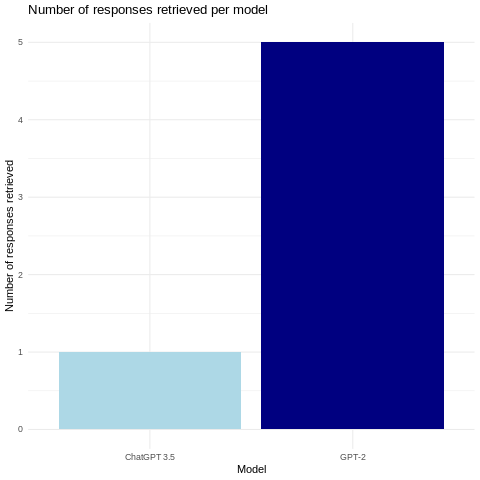

In [ ]:
%%R
# load packages
library(tidyverse)

# generate hyper insightful plot
ggplot(data = tibble(model = c('GPT-2', 'ChatGPT 3.5'),
                     n_responses_retrieved = c(5, 3)),
       mapping = aes(x = model,
                     y = n_responses_retrieved,
                     fill = model)) +
    geom_col() +
    scale_fill_manual(values = c('lightblue', 'navy')) +
    labs(title = 'Number of responses retrieved per model',
         y = 'Number of responses retrieved',
         x = 'Model') +
    theme_minimal() +
    theme(legend.position = 'none')